## Dataset preparation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay, precision_recall_curve
import tensorflow as tf
import tensorflow.keras as keras
from imblearn.over_sampling import SMOTE
from keras.optimizers.schedules import PolynomialDecay
from sklearn.tree import DecisionTreeClassifier
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
import numpy as np

C:\Users\amogh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../data/BankChurners.csv')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
df.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

In [6]:
df.shape

(10127, 20)

In [7]:
for col in df:
  print(col,df[col].unique())

Attrition_Flag ['Existing Customer' 'Attrited Customer']
Customer_Age [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Gender ['M' 'F']
Dependent_count [3 5 4 2 0 1]
Education_Level ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category ['Blue' 'Gold' 'Silver' 'Platinum']
Months_on_book [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Total_Relationship_Count [5 6 4 3 2 1]
Months_Inactive_12_mon [1 4 2 3 6 0 5]
Contacts_Count_12_mon [3 2 0 1 4 5 6]
Credit_Limit [12691.  8256.  3418. ...  5409.  5281. 10388.]
Total_Revolving_Bal [ 777  864    0 ...  534  476 2241]
Avg_Open_To_Buy [11914.  7392.  3418. ... 11831.  5

In [8]:
mask = (df['Marital_Status'] == 'Unknown') | (df['Education_Level'] == 'Unknown') | (df['Income_Category'] == 'Unknown')
df1 = df[~mask]

In [9]:
df2 = pd.get_dummies(df1,columns=['Education_Level','Marital_Status','Income_Category','Card_Category'])
df2.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,Existing Customer,45,M,3,39,5,1,3,12691.0,777,...,False,False,False,True,False,False,True,False,False,False
1,Existing Customer,49,F,5,44,6,1,2,8256.0,864,...,True,False,False,False,False,True,True,False,False,False
2,Existing Customer,51,M,3,36,4,1,0,3418.0,0,...,False,False,False,False,True,False,True,False,False,False
4,Existing Customer,40,M,3,21,5,1,0,4716.0,0,...,False,False,False,True,False,False,True,False,False,False
5,Existing Customer,44,M,2,36,3,1,2,4010.0,1247,...,False,False,True,False,False,False,True,False,False,False


In [10]:
df2.replace({False:0,True:1},inplace=True)

C:\Users\amogh\AppData\Local\Temp\ipykernel_3164\3655403143.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({False:0,True:1},inplace=True)


In [11]:
df2.replace({'Existing Customer':0,'Attrited Customer':1},inplace=True)

C:\Users\amogh\AppData\Local\Temp\ipykernel_3164\3474962622.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({'Existing Customer':0,'Attrited Customer':1},inplace=True)


In [12]:
df2.replace({'M':1,'F':0},inplace=True)

C:\Users\amogh\AppData\Local\Temp\ipykernel_3164\1516440226.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({'M':1,'F':0},inplace=True)


In [13]:
df2.dtypes

Attrition_Flag                      int64
Customer_Age                        int64
Gender                              int64
Dependent_count                     int64
Months_on_book                      int64
Total_Relationship_Count            int64
Months_Inactive_12_mon              int64
Contacts_Count_12_mon               int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                     int64
Total_Trans_Ct                      int64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Education_Level_College             int64
Education_Level_Doctorate           int64
Education_Level_Graduate            int64
Education_Level_High School         int64
Education_Level_Post-Graduate       int64
Education_Level_Uneducated          int64
Marital_Status_Divorced             int64
Marital_Status_Married            

In [14]:
df2.Attrition_Flag.value_counts()

Attrition_Flag
0    5968
1    1113
Name: count, dtype: int64

## Optional Dataset manipulation

In [15]:
df2.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver'],
      dtype='object')

In [16]:
df3 = df2.copy()
df3['Avg_Trans_Amt'] = df3['Total_Trans_Amt']/df3['Total_Trans_Ct']
df3['Monthly_Rev_Bal'] = df3['Total_Revolving_Bal']/df3['Months_on_book']
df3['Engagement_Drop'] = df3['Total_Ct_Chng_Q4_Q1']/df3['Total_Trans_Ct']
df3['Spending_Drop'] = df3['Total_Amt_Chng_Q4_Q1']/df3['Total_Trans_Amt']
cols_to_scale = ['Customer_Age', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
        'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
        'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
       'Avg_Utilization_Ratio','Contacts_Count_12_mon',
       'Avg_Trans_Amt','Monthly_Rev_Bal',
       ]

In [17]:

drop = [
        'Education_Level_College', 'Education_Level_Doctorate', 'Education_Level_Graduate', 'Education_Level_High School', 'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
    'Income_Category_$120K +', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K','Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
    'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'
]
df3.drop(columns=drop,inplace=True)

In [18]:
df3.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Avg_Trans_Amt', 'Monthly_Rev_Bal',
       'Engagement_Drop', 'Spending_Drop'],
      dtype='object')

In [19]:
X =df3.drop(columns=['Attrition_Flag'])
y = df3['Attrition_Flag']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [21]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Shape of X_train after SMOTE:", X_resampled.shape)
print("Shape of y_train after SMOTE:", y_resampled.shape)

Shape of X_train after SMOTE: (9526, 22)
Shape of y_train after SMOTE: (9526,)


In [22]:
scaler = MinMaxScaler()
X_resampled[cols_to_scale] = scaler.fit_transform(X_resampled[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [23]:
y_resampled.value_counts()

Attrition_Flag
0    4763
1    4763
Name: count, dtype: int64

## Model Trainning

In [24]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    class_weight="balanced",  # helps handle imbalance
    random_state=42
)

lgbm.fit(X_resampled, y_resampled)


[LightGBM] [Info] Number of positive: 4763, number of negative: 4763
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3048
[LightGBM] [Info] Number of data points in the train set: 9526, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=200,
               random_state=42)

## Model Report

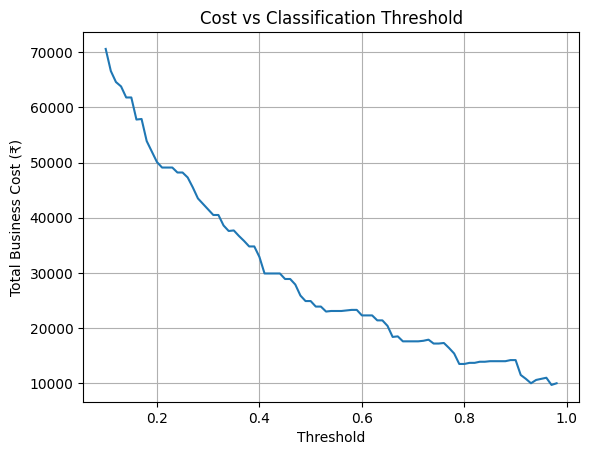

Optimal Threshold = 0.9699999999999995, Min Total Cost = ₹9700


In [ ]:
# Cost Matrix
thresholds = np.arange(0.1, 0.99, 0.01)
costs = []

COST_FN = 1000 # Missed churners i.e lost revenue --> lost future profits
COST_FP = 100 # Incorrectly targeted loyal users i.e unnecessary retention offers --> wasted on marketing
y_probs = lgbm.predict_proba(X_test)[:, 1]

for t in thresholds:
    y_pred = (y_probs > t).astype(int)
    fn = confusion_matrix(y_test, y_pred)[0,1]
    fp = confusion_matrix(y_test, y_pred)[1,0]
    
    total_cost = (fn * COST_FN) + (fp * COST_FP)
    costs.append((t, total_cost))

cost_df = pd.DataFrame(costs, columns=['Threshold', 'Total_Cost'])


plt.plot(cost_df['Threshold'], cost_df['Total_Cost'])
plt.xlabel("Threshold")
plt.ylabel("Total Business Cost (₹)")
plt.title("Cost vs Classification Threshold")
plt.grid(True)
plt.show()

# Find best threshold
best = cost_df.loc[cost_df['Total_Cost'].idxmin()]
print(f"Optimal Threshold = {best['Threshold']}, Min Total Cost = ₹{int(best['Total_Cost'])}")


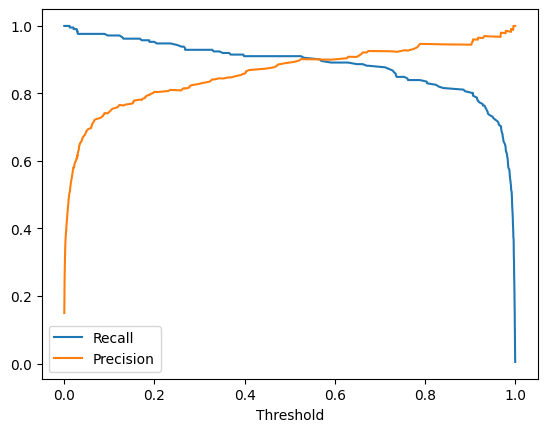

In [26]:
y_scores = lgbm.predict_proba(X_test)[:, 1]  # Prob of being class 1
precision, recall, thresholds = precision_recall_curve(y_test, y_scores, pos_label=1)

# Plot
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, precision[:-1], label='Precision')
plt.xlabel('Threshold')
plt.legend()
plt.show()

[[1202    3]
 [  67  145]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1205
           1       0.98      0.68      0.81       212

    accuracy                           0.95      1417
   macro avg       0.96      0.84      0.89      1417
weighted avg       0.95      0.95      0.95      1417

0.9921788146872308


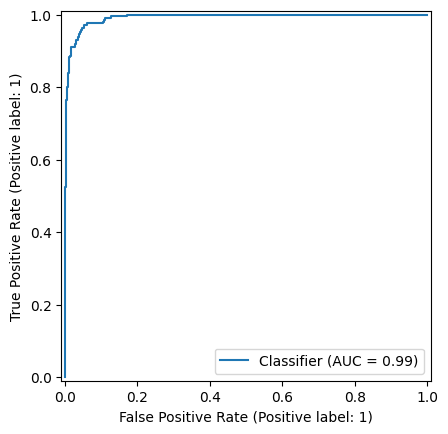

In [27]:
y_pred = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:, 1]


threshold = 0.97
y_pred = (y_prob > threshold).astype(int)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_prob))
RocCurveDisplay.from_predictions(y_test, y_prob,pos_label=1)
plt.show()

In [29]:
# For TreeExplainer to work correctly with Random Forest
explainer = shap.TreeExplainer(lgbm,data=X_resampled)

# Use scaled version of test set
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# SHAP values for class 0 (churn)
shap_values = explainer.shap_values(X_test_df,check_additivity=False)


In [30]:
shap.summary_plot(shap_values[:,:,1], X_test_df, plot_type='bar')

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [31]:
import joblib
import json
# Save model
joblib.dump(rf, '../model/churn_model.pkl')

# If you used scaling (e.g., StandardScaler or MinMaxScaler):
joblib.dump(scaler, '../model/scaler.pkl')  # Optional but often required

# Save feature order (important when serving from dict inputs in API)
feature_order = X_train.columns.tolist()
with open('../model/feature_order.json', 'w') as f:
    json.dump(feature_order, f)
